# PHYS 297 - Homework 8
You can use these buttons below to launch this Jupyter notebook in either binder or Colab.

[![Open in Binder](https://mybinder.org/badge_logo.svg)](http://beta.mybinder.org/v2/gh/mgrau/phys297/main?urlpath=%2Ftree/Homework%208.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mgrau/phys297/blob/main/Homework%208.ipynb)

# Introduction
In this homework we are going to fit some sample data a couple of different ways. First we will do so by manually minimizing the $\chi^2$ statistic. The second way is we will used a baked in fitting routine in scipy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin

In [2]:
x = np.array([ 0.        ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y = np.array([ 8.61246506, 11.58292236, 12.53983189,  8.68263453, 10.57722031,
       10.29101105, 18.92633043, 12.00263503, 13.08446177, 16.75505858,
       14.91710976, 16.19011213, 12.22301358,  9.52532955, 13.25644909,
       17.25267354, 30.47616791, 38.89305103, 46.8808918 , 48.61157155,
       45.39733212, 34.88188004, 29.78037267, 17.55218362, 12.4880385 ,
        8.01861942, 12.45429319, 11.33854886, 15.19719134, 16.9819019 ])
err = np.array([3.65415803, 1.94350023, 3.2334227 , 3.56901861, 2.44858774,
       3.46534209, 3.20391024, 2.9333031 , 2.75511109, 2.68148604,
       2.7125827 , 2.50871606, 2.84690381, 3.50579992, 2.37690687,
       3.33778892, 3.71792474, 2.6747577 , 3.03463841, 3.03877765,
       2.7184754 , 3.0736716 , 3.146978  , 2.97643006, 2.57783259,
       2.74842212, 3.3174854 , 2.81992047, 3.04399964, 2.80985811])

Text(0, 0.5, 'voltage (mV)')

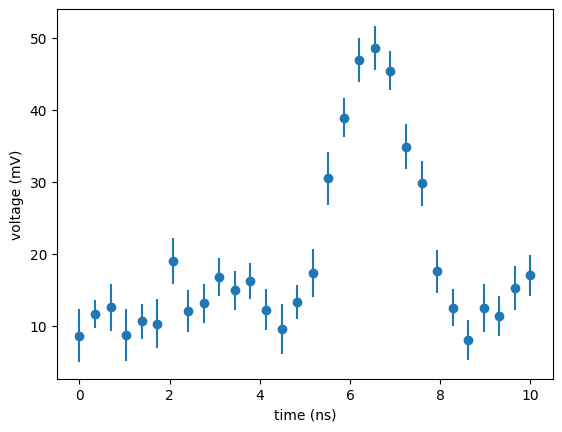

In [3]:
plt.errorbar(x, y, err, fmt='o')
plt.xlabel('time (ns)')
plt.ylabel('voltage (mV)')

# Problem 1 - $\chi^2$ Fitting
1. Write a function `f(x, params)` that takes an array `x` as an input, and a list of parameters `params`, and computes the following:
$$
f(x) = p_0 + p_1 \times \exp\left(-\frac{(x - p_2)^2}{p_3}\right)
$$
2. Plot the data, with errorbars, and on the same figure, plot this function. Choose a set of good guess values for `params`, called `guess. Hint: to generate your guess, try the following:
    - For `guess[0]` try the minimum value of `y`.
    - For `guess[1]` try the difference of the maximum value of `y` and the minimum value of `y`
    - For `guess[2]` try the `x` value of the peak of `y`.
    - For `guess[3]` try a few different values until your plot starts to look close
What is are your guesses? Do they make sense?
3. Write a function `X2(params)` to calculate the value of $\chi^2$ as a function of `params`
$$
\chi^2(p) = \sum_i \frac{(y_i - f(x, p))^2}{\text{err}_i^2}
$$
4. Use `fmin` to calculate the value of `params` that minimizes $\chi^2$:
```python
fit_params = fmin(X2, guess)
```
What do you get for `fit_params`? Are they close to your guess? Are they better? What value is the value of $\chi^2$ for your guess and for the value returned from `fmin`?
5. Plot `f(x, fit_params)` together with the data and your guess.

# Problem 2 - Nonlinear least squares fitting
To use the built in curve fitting routine in scipy, import `curve_fit` from `scipy.optimize`. The function `curve_fit` uses a slightly different form of the fitting function. Write a function `g` that is a function of 5 different parameters, `g(x, p0, p1, p2, p3)` that calculates the same function as `f(x, p)` from the previous problem. Use this to fit the data and compare the value of your fit params. Create a plot of this fitting attempt as well.

In [ ]:
from scipy.optimize import curve_fit

def g(x, p0, p1, p2, p3):
    return

fit_params = curve_fit(g, x, y, guess, sigma=err)